# SafeComm-Digital-Security-Solutions

Welcome to SafeComm Digital Security Solutions! In the modern digital age, people across the globe
communicate largely through text messages. SMSs have become an integral part of our daily lives.
However, with this ease of communication, there comes a dark side: SMS-based fraud. Unsuspecting
individuals often receive malicious or scam texts intending to deceive or cause harm.
SafeComm has recently partnered with a major telecom provider that has shared anonymized SMS
data. This dataset comprises a mix of regular day-to-day messages and some potentially fraudulent
ones. The objective is to design a mechanism that identifies and flags these fraudulent messages
automatically. This way, we can warn users or even prevent these messages from being delivered
altogether.

# *Dataset features*

• Fraudulent: Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)

• SMS Text: The content of the SMS

• ID: A unique identifier for each SMS

• Date and Time: Timestamp indicating when the SMS was sent

# *Assignment*

• Perform an Explanatory data analysis (EDA) with visualization using the entire dataset..

• Preprocess the dataset (impute missing values, encode categorical features with one-hot
encoding). Your goal is to estimate whether an SMS is fraudulent

• Define whether this is a regression, classification or clustering problem, explain why and
choose your model design accordingly. Test at least 3 different models. First, create a
validation set from the training set to analyze the behaviour with the default
hyperparameters. Then use cross-validation to find the best set of hyperparameters. You
must describe every hyperparameter tuned (the more, the better)

• Select the best architecture using the right metric

• Compute the performances of the test set

• Explain your results

First, lets begin by importing all the necessary libraries we will be utilising.

In [8]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import requests
import zipfile
import os

from nltk.tokenize import word_tokenize
import nltk, spacy
import re, string, unicodedata
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer


## EDA analysis ##

* Understanding the Dataset: We use python libraries to scan the dataset and gain insight of its structure

* Checking for Integrity: We scan the dataset to identify NaN values and check if the dataset is consistent

* Visualize Distribution of Data: using sns and matplotlib we can see how the data is structured in the cartesian plane

* Use pairplots for identify relationships: Apparently not necessary

# Showing the dataframe

* here we display the complete dataset in a dataframe with 4 columns:
  - *Fraudolent*: a binary value, that acts like a boolean, that assumes the value of 0 when the sms is not spam; 1 when it is fraudolent.
  - *SMS test*: a string of text, representing an sms.
  - *ID*: a unique alphanumeric code of 7 digits that represents the sms message.
  - *Date and Time*: time in which the message has been sent (it is formatted as date and time)

* Plus, for operational purposes, we needed to reformat the name of the *SMS test* and *Date and Time* columns.

In [9]:
sms_df = pd.read_csv("sms.csv")
sms_df.rename(columns={'SMS test': 'SMS_test'}, inplace=True)
sms_df.rename(columns={'Date and Time': 'Date_and_Time'}, inplace=True)
sms_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sms.csv'

Let's display the number of rows present in our dataset to gain an understanding of just how many fields we are working with.

In [ ]:
print("Rows:",sms_df.shape[0])

Rows: 5572


Now let's count the number of NaN values we have in our dataset.

In [ ]:
nan_count = sms_df.isna().sum()

# Display the count of NaN values for each column
print("NaN values in each column:")
print(nan_count)

NaN values in each column:
Fraudolent       0
SMS_test         0
ID               0
Date_and_Time    0
dtype: int64


Fortunately we don't have NaN values in the dataset, so it is consistent and we do not need to impute missing values.

Next, we need a clear understanding of just how many of the SMS's in our dataset are actually Fraudulent.

In [ ]:
print("\nFraudolent column summary:")
print(sms_df['Fraudolent'].value_counts())
fraudolent_count = sms_df['Fraudolent'].value_counts()[1]
non_fraudolent_count = sms_df['Fraudolent'].value_counts()[0]
percentage_fraudolent = (fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100
percentage_non_fraudolent = (non_fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100
print("Percentage of fraudolent messages:", percentage_fraudolent,'%')
print("Percentage of non-fraudolent messages:", percentage_non_fraudolent,'%')


Fraudolent column summary:
0    4825
1     747
Name: Fraudolent, dtype: int64
Percentage of fraudolent messages: 13.406317300789663 %
Percentage of non-fraudolent messages: 86.59368269921033 %


* Here we can clearly see that there are 4825 Non-Fraudulent messages and 747 Fraudulent messages.

* Furthermore we have displayed the percentage of fraudulent and non-fraudulent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudulent messages.

## Data Distribution and Correlations ##

* In this section, we are analyzing the distribution of data in te cartesian plane utilizing sns and matplotlib tools.

* In particular, it seems that the most interesting feature to study in the dataset (in terms of distribution analysis) is the *Fraudolent* column.

## Let's Get Plotting!
* Create a distribution plot (histogram) to visualize the data


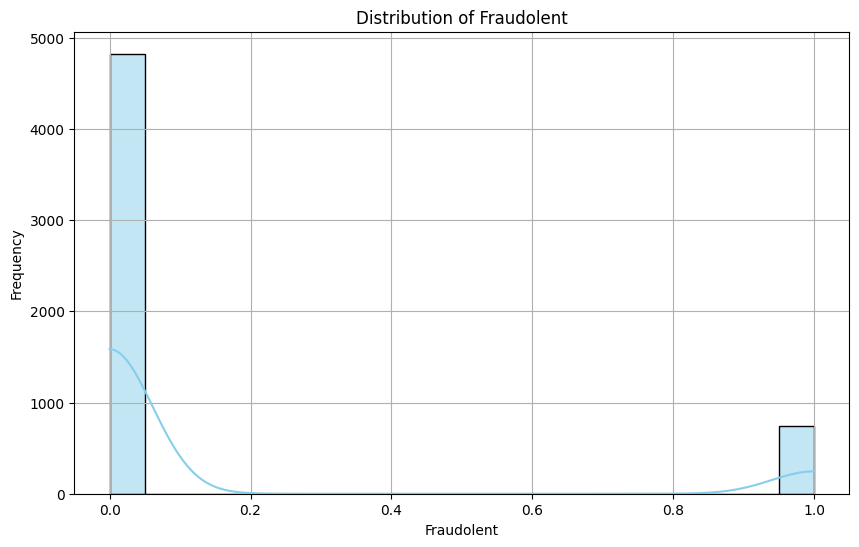

In [ ]:

column_to_analyze = 'Fraudolent'
plt.figure(figsize=(10, 6))
sns.histplot(sms_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)
# Show the plot
plt.show()

Considering the histogram plotted, it's now clearer than ever just how unbalanced our dataset truly is.

*We will definitely need to fix this further down the line*

For now let's graphically visualise the difference of Fraudulent Vs. Non-Fraudulent text messages:

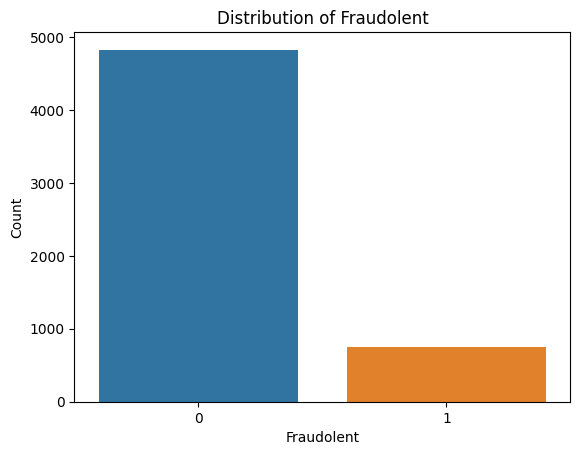

In [ ]:
# Visualize the distribution of Fraudolent
sns.countplot(data=sms_df, x='Fraudolent')
plt.title('Distribution of Fraudolent')
plt.xlabel('Fraudolent')
plt.ylabel('Count')
plt.show()

It's also important for us to visualize the text length distribution graphically to see if there is any correlation between:
* Text Length
* Count of Fraudulent Messages

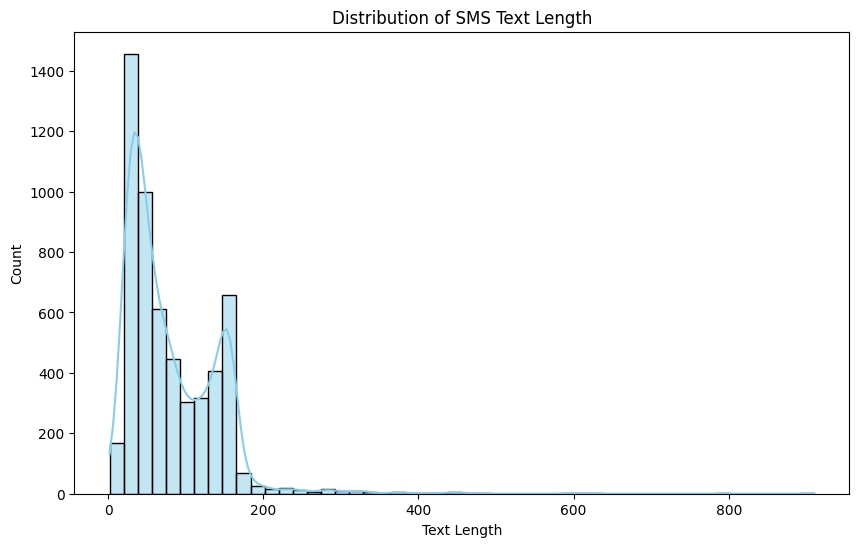

In [ ]:
sms_df['text_length'] = sms_df['SMS_test'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=sms_df, x='text_length', kde=True, bins=50, color='skyblue')
plt.title('Distribution of SMS Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

While we're visualising our data, let's also consider the Temporal Distribution of the SMS's.

We examine the graph to inspect whether the given data is skewed towards a specific year.

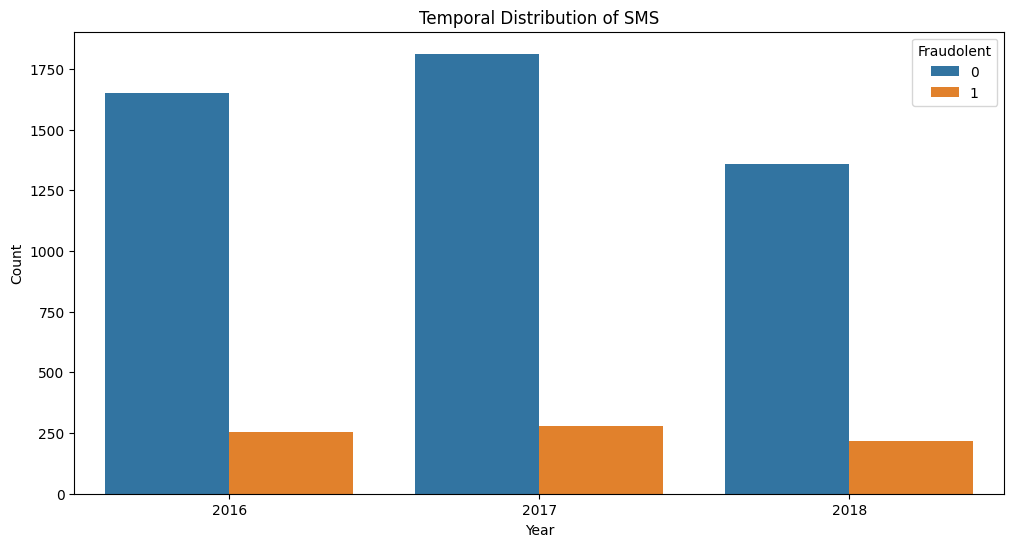

In [ ]:
# Assuming the Date and Time column is named 'Date_and_Time'
sms_df['Date_and_Time'] = pd.to_datetime(sms_df['Date_and_Time'])

# Extract date and time components
sms_df['Year'] = sms_df['Date_and_Time'].dt.year
sms_df['Month'] = sms_df['Date_and_Time'].dt.month
sms_df['Day'] = sms_df['Date_and_Time'].dt.day

# Visualize temporal distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fraudolent', data=sms_df)
plt.title('Temporal Distribution of SMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Luckily as shown in the graph, there is no strong correlation between the number of fraudulent messages when looking at individual years.

They seem to be fairly well-dispersed across the years.

Now lets build a correlation matrix to see exactly what columns are correlated (if any)

__Building the correlation matrix, we need only to correlate the Fraudulent feature with the text length, so we can drop the other columns (ID, Date_and_Time, Year, Month, Day)__

<ipython-input-12-43d728a11383>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dropped.corr()


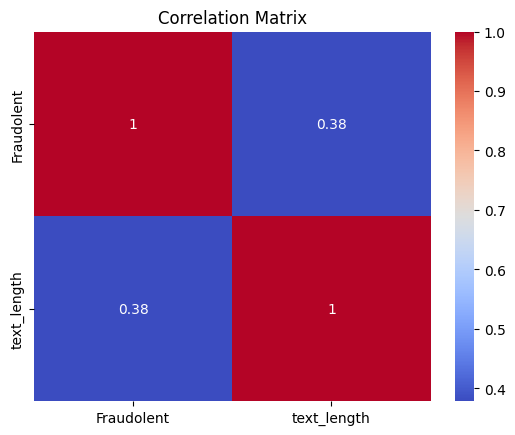

In [ ]:
df_dropped = sms_df.drop(['Year', 'Month', 'Day', 'ID', 'Date_and_Time'], axis=1, inplace=False)
correlation_matrix = df_dropped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Given the correlations calculated, we can see that there is no strong correlation whatsoever between text_length and Fraudolent values.

*This means that we can use all of them for our analysis.*
* We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.
* We can interpet the correlation between Fraudolent and text_length as as weak correlation at most.

### By splitting the date into its components, we can analyze the temporal distribution of the messages.
* This allows us to see that in our dataset the range of years for which we are viewing sent SMS Messages is from 2016 to 2018.

In [ ]:
sms_df.columns
earliest_date = sms_df['Date_and_Time'].min()
latest_date = sms_df['Date_and_Time'].max()
print("Earliest date of an SMS message sent:", earliest_date)
print("Latest date of an SMS message sent:", latest_date)
sms_df.corr()

Earliest date of an SMS message sent: 2016-02-15 00:00:00
Latest date of an SMS message sent: 2018-09-19 00:00:00


<ipython-input-13-4f45f72fddba>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms_df.corr()


,Fraudolent,text_length,Year,Month,Day
Fraudolent,1.000000,0.378359,0.004349,-0.004380,-0.004535
text_length,0.378359,1.000000,0.029498,-0.010077,0.014077
Year,0.004349,0.029498,1.000000,-0.304300,-0.054934
Month,-0.004380,-0.010077,-0.304300,1.000000,0.007355
Day,-0.004535,0.014077,-0.054934,0.007355,1.000000


* By analyzing the correlation matrix, we can determine the following:
    
    • The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
    
    • Positive correlation coefficients indicate that the variables tend to increase or decrease together.
    
    • Negative correlation coefficients indicate that as one variable increases, the other tends to decrease.
   
    • The closer the correlation coefficient is to 1 or -1, the stronger the correlation.
    
    • A correlation coefficient close to O indicates no or weak correlation.

* Based on the correlation matrix, we can conclude that there is no strong correlation between the two most importanto variables in the dataset. This means that all variables can be used for analysis without causing multicollinearity issues.

Now let us tokenize the text and count word frequencies.
We will need to create a datafrom formed from the word counts.

We then can plot the top N words we need, 

__N being a variable that is completely interchangeable depending on our needs.__

In [ ]:
fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 1]['SMS_test'])
words = fraudulent_text.split()
word_counts = pd.Series(words).value_counts()
word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Words in Fraudulent Rows')
plt.show()

NameError: name 'df_dropped' is not defined

# Preprocessing

* In this section we will try to transform the data into a more suitable format for machine learning Algorithms, using various methods: cleaning data, encoding categorial features, scaling numerical features.




### Coming back to our problem regarding our unbalanced dataset:
* We combat and adjust the balance problem 
* This can be simply achieved by oversampliny the Fraudulent part of our X_train variable
* We use RandomOverSampler to get the results we need.


In [ ]:
oversampler = RandomOverSampler(random_state=42)
X=df_dropped
y=df_dropped['Fraudolent']
df_X, df_y = oversampler.fit_resample(X, y)
df_X['Fraudolent'].value_counts()

0    4825
1    4825
Name: Fraudolent, dtype: int64

__Now that our data is perfectly balanced__

Let's further halve our data.

In [ ]:
df_X_halved, _, df_y_halved, _ = train_test_split(df_X, df_y, test_size=0.5, random_state=42)

print(df_X_halved['Fraudolent'].value_counts())

1    2433
0    2392
Name: Fraudolent, dtype: int64


We're going to setup the figure with subplots.

These will be divided as follow:
1. Our Original Dataset Histogram
2. Our Balanced Dataset Histogram
3. Our Final Dataset Histogram

_We will also adjust the layout of the subplots for better spacing._

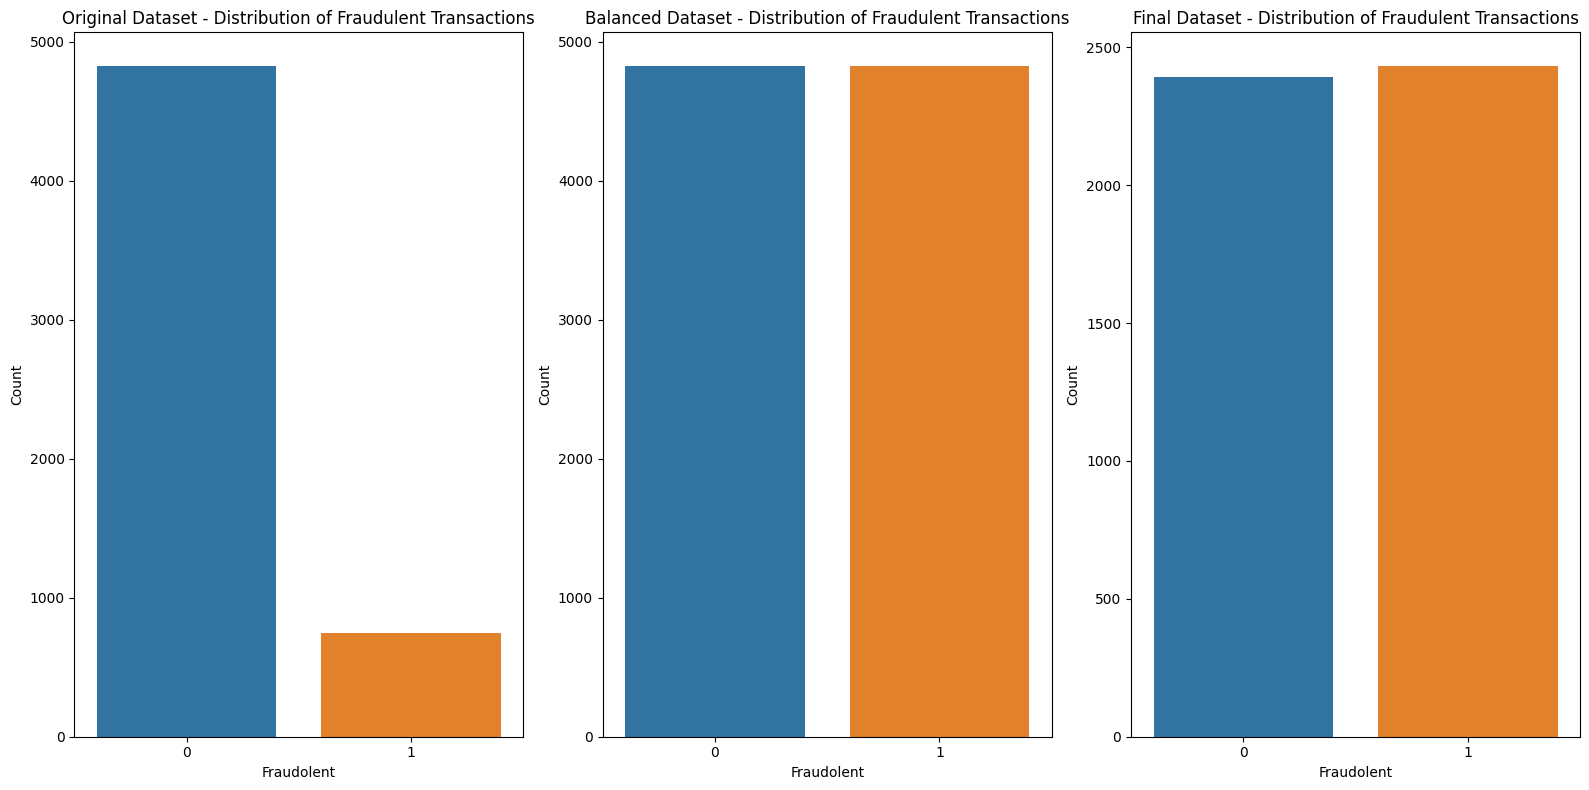

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
# Original dataset histogram
sns.countplot(x='Fraudolent', data=df_dropped, ax=axes[0])
axes[0].set_title('Original Dataset - Distribution of Fraudulent Transactions')
axes[0].set_xlabel('Fraudolent')
axes[0].set_ylabel('Count')
# Balanced dataset histogram
sns.countplot(x='Fraudolent', data=df_X, ax=axes[1])
axes[1].set_title('Balanced Dataset - Distribution of Fraudulent Transactions')
axes[1].set_xlabel('Fraudolent')
axes[1].set_ylabel('Count')
# Final dataset histogram
sns.countplot(x='Fraudolent', data=df_X_halved, ax=axes[2])
axes[2].set_title('Final Dataset - Distribution of Fraudulent Transactions')
axes[2].set_xlabel('Fraudolent')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

### __Look just how beautiful our subplots are__

Now, considering we imported nltk earlier, we will begin utilising our tokenizer.

* We download our stopwords
* We tokenize the text
* We set English stopwords specifically 

In [ ]:
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now we need to proceed with a big portion of code to further simplify our dataset:

It will consist of the following:
1. Removing the HTML strips
 * We are able to do this thanks to the BeautifulSoup library that we imported earlier
 * We need to apply this function on our SMS_test column
2. Removing the square brackets
 * We need to once again apply the function to the SMS_test column
3. Removing the noisy text
 * Also applying the function to the SMS_test column
4. Defining a function to remove the special characters
 * Once again applying the function to the SMS_test column.
5. Next we will stemm the text 
 * As always not forgetting to apply the function to the SMS_test column
6. Then we need to set our stopwords to English

7. Finaly we remove the stopwords from our dataset
 * Concluding by also removing the stopwords from the SMS_test column

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(strip_html)
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(remove_between_square_brackets)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(denoise_text)
#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(remove_special_characters)
#stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
def stem_text(text):
  stemmer = PorterStemmer()
  words = word_tokenize(text.lower())
  stemmed_words = [stemmer.stem(word) for word in words if word.isalpha()]
  return " ".join(stemmed_words)
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(simple_stemmer)
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(stem_text)
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(remove_stopwords)


<ipython-input-89-73483a2a4a88>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


{'can', 'herself', 'did', 'this', "weren't", "needn't", 'further', 'such', 'up', 'off', 'no', 'whom', 'being', 'for', 'they', 'has', 'yourselves', 'other', "hasn't", 'shouldn', 'should', 'out', 'few', 'itself', 'while', 'your', 'same', 'wasn', 'all', "you'd", 'nor', 'until', 'ourselves', "won't", 'than', 'o', 'the', 'me', 'ma', 'there', 'she', 'aren', 'shan', 'our', 'so', 'm', 'its', 'once', 'only', 'hadn', 'having', 're', 'needn', 'and', 'against', 'if', 'don', "it's", "wasn't", 'by', 'before', "couldn't", 'about', 'these', "mightn't", "mustn't", 'under', 'where', 'it', "isn't", 'will', "don't", 'after', 'couldn', "doesn't", 'in', 'does', 'now', 'hers', 'but', "didn't", 'my', 'ours', 'y', 'been', "hadn't", 'below', 'theirs', 'those', 't', "haven't", 'was', "shan't", 'over', 'why', 'yours', 'are', 've', 'at', 'very', 'weren', 'each', 'am', 'which', 'again', 'then', 'them', 'of', "shouldn't", "she's", 'himself', 'him', 'from', 'mustn', 'how', "should've", 'd', 'doing', 'both', 'some', "

# Bag of Words

We use Bag of Words (BoW) because it is a popular method used in Natural Language Processing (NLP) to convert text data into numerical features that can be used by machine learning algorithms.

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
BoW_X=cv.fit_transform(df_X_halved['SMS_test'])
print('BOW_cv_train:', BoW_X.shape)



BOW_cv_train: (4825, 27655)


We used BoW for a variety of reasons, the top 3 being:
1. Simplicity
2. Efficiency
3. Effectiveness

In [ ]:
scaler = StandardScaler()
print(BoW_X)
scaler.fit_transform(BoW_X)
print(BoW_X)

  (0, 27570)	1
  (0, 27571)	1
  (0, 27572)	1
  (2, 22163)	1
  (2, 11487)	1
  (2, 14802)	1
  (2, 11725)	1
  (2, 6409)	1
  (2, 7865)	1
  (2, 17088)	1
  (2, 19663)	1
  (2, 24336)	1
  (2, 1669)	1
  (2, 22164)	1
  (2, 11488)	1
  (2, 26141)	1
  (2, 12139)	1
  (2, 14803)	1
  (2, 11726)	1
  (2, 17147)	1
  (2, 9001)	1
  (2, 6410)	1
  (2, 7866)	1
  (2, 17089)	1
  (2, 19664)	1
  :	:
  (3849, 15001)	1
  (3849, 2005)	1
  (3849, 9082)	1
  (3849, 19593)	1
  (3849, 10870)	1
  (3849, 2001)	1
  (3849, 5850)	1
  (3850, 25625)	1
  (3850, 7098)	1
  (3850, 13997)	1
  (3850, 25626)	1
  (3850, 7099)	1
  (3852, 27596)	1
  (3852, 23007)	1
  (3852, 18565)	1
  (3852, 27597)	1
  (3852, 503)	1
  (3852, 23008)	1
  (3857, 4449)	1
  (3857, 4450)	1
  (3857, 23941)	1
  (3857, 4451)	1
  (3859, 24657)	1
  (3859, 14817)	1
  (3859, 24658)	1


ValueError: ignored

Trying to implement a standardscaler on the processed data (BoW_X)

 **error message: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.**

# Models

To work on our models let's split the dataset into Train and Test sets.

In [ ]:
X = BoW_X
y = df_X_halved['Fraudolent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train_tmp shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3860, 27655), y_train_tmp shape: (3860,)
X_test shape: (965, 27655), y_test shape: (965,)


# SVC

First let's start with our SVM model. 

We need to calculate the evaluation metrics that we used, those being:
1. Accuracy
2. Precision
3. Recall
4. F1 Score

In [ ]:
model_svc = SVC()

model_svc.fit(X_train, y_train)
print(model_svc.score(X_train, y_train))

y_pred = model_svc.predict(X_test)

print(model_svc.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)


0.9316062176165804
0.917098445595855
Accuracy:  0.917098445595855
Precision:  0.8653500897666068
Recall:  0.9897330595482546
F1 Score:  0.9233716475095786


### Let's fine-tune our model with HyperParameters!
We use these hyperparameters to better the values of our outputted performance metrics that we obtained from the previous SVM model 

In [ ]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

grid_search = GridSearchCV(model_svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model)
print(best_params)


SVC(C=0.1, gamma=1)
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### Now lets construct our model once again after the hyperparameters have been tuned.

In [ ]:
model_svc_upd = SVC(C=0.1, gamma=1, kernel='rbf')

model_svc_upd.fit(X_train, y_train)
print(model_svc_upd.score(X_train, y_train))

y_pred = model_svc_upd.predict(X_test)

print(model_svc_upd.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

0.9308290155440414
0.9367875647668393
Accuracy:  0.9367875647668393
Precision:  0.895910780669145
Recall:  0.9897330595482546
F1 Score:  0.9404878048780487


We can clearly see how our hyperparameters have improved every single one of our precision metric values compared to the first model.

In essence:

__The hyperparameters did their job in ensuring our results are tuned and fitted to our dataset__

We observe that the results are rather high in regards to all our performance metrics.

This shows us that SVM classification model is an amazing model to use based on our dataset in detecting Fraudulent Vs. Non-Fraudulent text messages.

Now let's plot a confusion Matrix once again based on our SVM model:

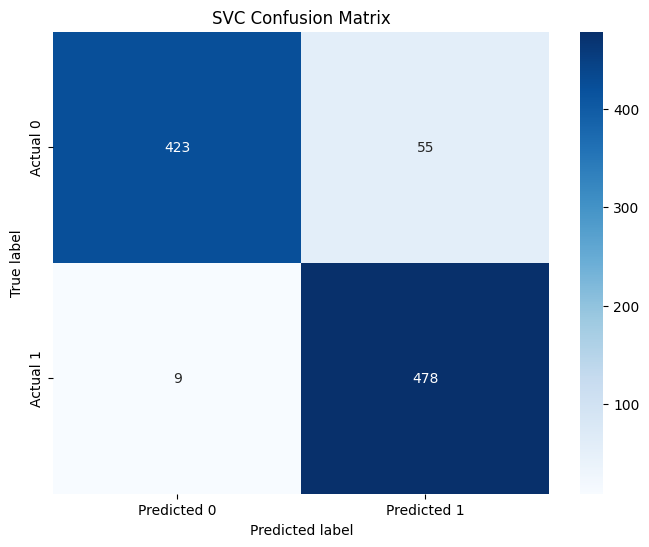

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Random Forest

Our next model we will be using is Random Forests.

This is usuallty a decent model to use when considering classification problems.

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
print(model_RFC.score(X_train, y_train))
y_pred = model_RFC.predict(X_test)
print(model_RFC.score(X_test, y_test))
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

0.9422279792746114
0.5046632124352332
Accuracy:  0.5046632124352332
Precision:  0.5046632124352332
Recall:  1.0
F1 Score:  0.6707988980716253


After the first analyses of our performance metrics we can definiely see a recognisable difference between the results obtained using our SVM model compared to our Random Forest Model.

__However__

Let's fine-tune our hyperparameters and see if that changes our results.

In [ ]:

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]

}

random_search = RandomizedSearchCV(model_RFC, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f'Best Parameters: {best_params}')

KeyboardInterrupt: ignored

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(model_RFC, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model)
print(best_params)

### Now let's construct our model again after fine-tuning:

0.5041450777202072
0.5046632124352332
Accuracy:  0.5046632124352332
Precision:  0.5046632124352332
Recall:  1.0
F1 Score:  0.6707988980716253


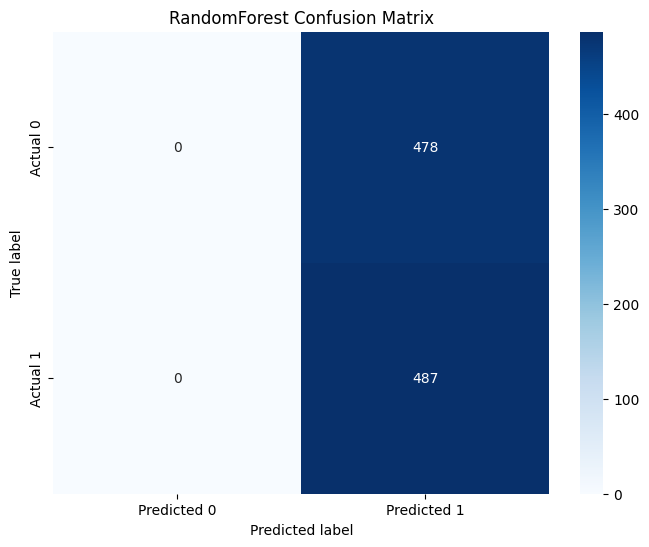

In [ ]:

model_RFC_upd = RandomForestClassifier(n_estimators= 100, min_samples_split=2, min_samples_leaf= 4, max_features= None, max_depth= 30)

model_RFC_upd.fit(X_train, y_train)
print(model_RFC_upd.score(X_train, y_train))

y_pred = model_RFC_upd.predict(X_test)

print(model_RFC_upd.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)


# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Interestingly enough, even after we have fine-tuned our hyperparameters our results are still uncomparable to those obtained from our SVM model.

With this analyses we can conclude that using the SVM model over our Random Forest model is definitely the better classification model alternative.

__However, why stop there?__

Let's test another model!

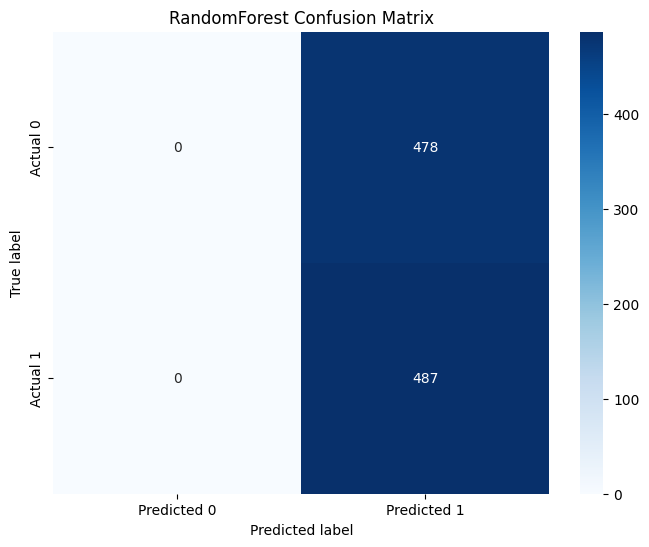

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Multinomial NB

Now we will be constructing a MultinomialNB model and observe the obtained results.

In [ ]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train, y_train)
print(model_MNB.score(X_train, y_train))
y_pred = model_MNB.predict(X_test)
print(model_MNB.score(X_test, y_test))

0.9422279792746114
0.5046632124352332


### After constructing the classification model:
The results obtained even though are better in some aspects compared to our Random Forest model, and worse in others. 
There is no comparison whatsoever still between this model and our previous SVM Model.

__Let's not jump the gun though!__

we should fine-tune our hyperparameters to see if the obtained results change in any way.

In [ ]:

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
}

grid_search = GridSearchCV(model_MNB, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model)
print(best_params)

MultinomialNB(alpha=0.1)
{'alpha': 0.1}


0.9422279792746114
0.5046632124352332


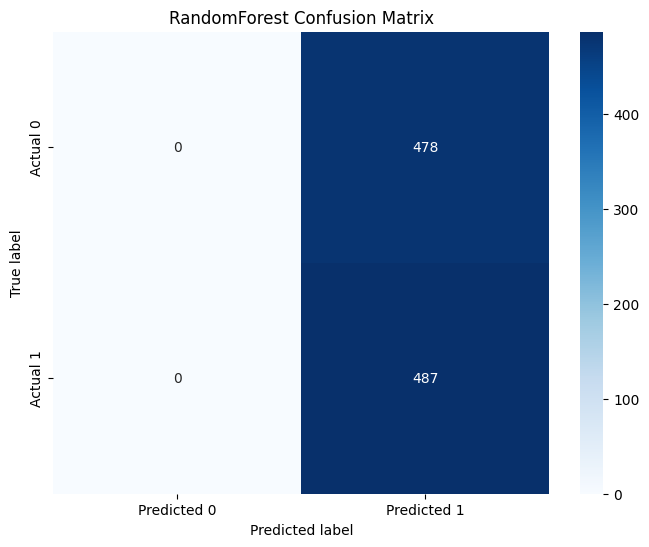

In [ ]:
model_MNB_upd = MultinomialNB(alpha=0.1)

model_MNB_upd.fit(X_train, y_train)
print(model_MNB_upd.score(X_train, y_train))

y_pred = model_MNB_upd.predict(X_test)

print(model_MNB_upd.score(X_test, y_test))


### Alas based on our found values:
Even with hyperparameter fine-tuning, MultinomialNB seems to be no match to our SVM model.
The results obtained just do not come close to the performance metric scores obtained in our SVM classification model.

__This is rather interesting__

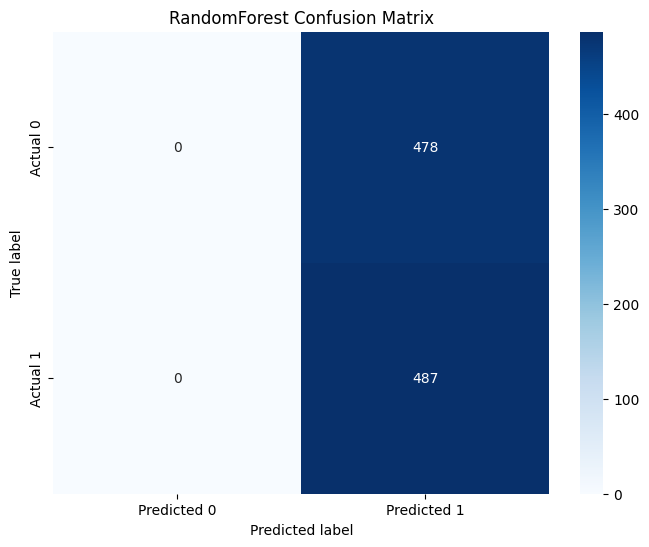

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Concluding Results:
After testing a whopping 3 Classification models, fine-tuning hyperparameters and observing performance metric scores, there is __one clear winner__

Our Random Forest and MultinomialNB model are no match for the SVM Classification model.

### What a Journey this has been!
